Define a function that wisulaizes attention matrices with a heatmap:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_attention_heatmap(tokens, attention_matrix, layer_idx):
       # Create heatmap
    plt.figure(figsize=(len(tokens), len(tokens)))
    ax = sns.heatmap(
        attention_matrix,
        xticklabels=tokens,
        yticklabels=tokens,
        annot=True,
        fmt='.3f',
        cmap='Blues',
        cbar_kws={'label': 'Attention Weight'}
    )
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    plt.title(f'Attention Heatmap - Layer {layer_idx}, ()')
    plt.xlabel('Key Tokens')
    plt.ylabel('Query Tokens')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


Define a function that takes a model and its tokenizer and  a layer index and return the tokens and the attention weights from that layer:

In [3]:
import torch
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def get_tokens_and_attention_matrix(text, model, tokenizer, layer_idx):
 
    # Tokenize input
    inputs = tokenizer(text, return_tensors='pt')
    
    # Forward pass
    with torch.no_grad():
        outputs = model(**inputs)
    
    # outputs.attentions is a tuple of  attention tensors, one per layer
    print("ATT WEIGHTS #LAYERS:", len(outputs.attentions))
    # Shape for each layer: (batch_size, num_heads, seq_len, seq_len) 
    # Take only the attention weights of layer layer_idx, and for the first input 
    # text (there is only one) => shape: (num_heads, seq_len, seq_len)
    last_layer_attention = outputs.attentions[layer_idx][0]
    
    # Average over attention heads ==> Shape: (seq_len, seq_len)
    attention_matrix = last_layer_attention.mean(dim=0).detach().cpu().numpy()
    # attention_matrix = attention_matrix + attention_matrix.T
    
    # Get token labels
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    # Discard the special tokens (BOS, and the EOS)
    # tokens = tokens[1:-2]
    # attention_matrix = attention_matrix[1:-2,1:-2]

    return tokens, attention_matrix
    

Load model:

In [4]:
import torch
from transformers import AutoTokenizer, AutoModel

# MODEL_NAME = "google-bert/bert-base-uncased"
# MODEL_NAME = "jhu-clsp/mmBERT-small"
# MODEL_NAME = "jhu-clsp/mmBERT-base"
MODEL_NAME = "Qwen/Qwen2.5-0.5B"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME, output_attentions=True)

tokenizer.tokenize("John did not eat the apple")

['John', 'Ġdid', 'Ġnot', 'Ġeat', 'Ġthe', 'Ġapple']

Compute and visualize self-attention matrix from a given layer. Note: remember that in a transformer decoder, self-attention is masked for future tokens, so for a decoder-only model (like most LLMs), attention weights on next tokens are all equal to zero.

ATT WEIGHTS #LAYERS: 24


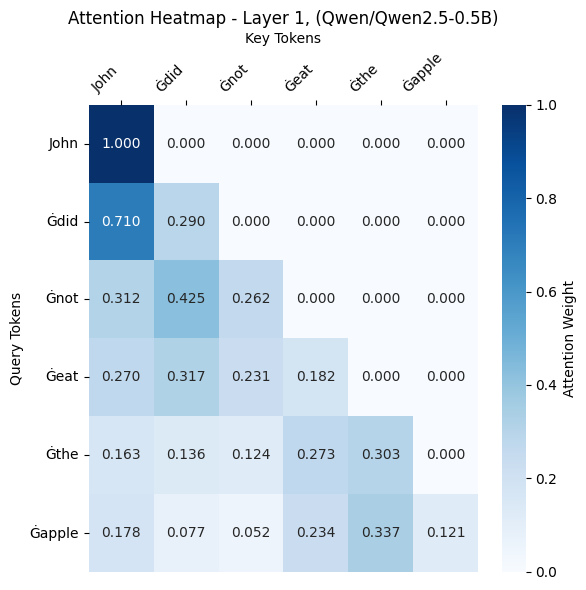

In [19]:
# Example
text = "John did not eat the apple"
# text = "Jean n'a pas mangé la pomme."

layer_idx = 1

tokens, att_matrix = get_tokens_and_attention_matrix(text, model, tokenizer, layer_idx)
visualize_attention_heatmap(tokens, att_matrix, layer_idx)
